In [63]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Постройте график опубликованных вакансий по датам
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Найдите те вакансии с использованием python, которые вам интересны
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных вакансий

In [1]:
import requests
import pandas as pd
from tqdm.auto import tqdm

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&per_page={num_per_page}'

In [3]:
res = requests.get(url)
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

20

In [6]:
# Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
vac_df = pd.DataFrame()
all_vacancy_ids= []
for i in tqdm(range(vacancies.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vac_df = pd.concat([vac_df, pd.json_normalize(vacancies['items'])], axis = 0)
#     print(vacancies['items'])
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)


  0%|          | 0/8 [00:00<?, ?it/s]

In [7]:
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
vac_description = pd.DataFrame()
new_v_list = []
for vac_id in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    v1 = res.json()
    new_v_list.append(v1)
vac_description = pd.json_normalize(new_v_list)
vac_description.tail()

  0%|          | 0/754 [00:00<?, ?it/s]

,id,premium,relations,name,insider_interview,response_letter_required,address,allow_messages,contacts,description,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.metro,test.required,immediate_redirect_url
749,54497432,False,[],Infrastructure Engineer,None,False,NaN,True,None,<p>Команда Algo Platform &amp; Market Connecti...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
750,54238661,False,[],Эксперт сопровождения Hadoop (SberData),None,False,NaN,True,None,<p><strong>SberData</strong> - департамент по ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
751,54922557,True,[],Клиентский менеджер малого и микробизнеса,None,False,NaN,True,None,<p>Клиентский менеджер малого и микробизнеса –...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://hh.ru/vacancy/53361761
752,54922574,True,[],Ведущий специалист по взысканию (г. Мытищи),None,False,NaN,False,None,"<p>Специалист по взысканию помогает клиентам, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://hh.ru/vacancy/54644156
753,54922558,True,[],Старший менеджер по привлечению корпоративных ...,None,False,NaN,True,None,<p>Задача старшего менеджера по работе с корпо...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://hh.ru/vacancy/45381514


In [8]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
v_skills = vac_description[['id', 'key_skills']].copy()
v_skills.head(5)

,id,key_skills
0,54852945,[]
1,53867545,"[{'name': 'Анализ ФХД'}, {'name': 'Финансовый ..."
2,54852814,[]
3,54715174,[]
4,53361761,"[{'name': 'Активные продажи'}, {'name': 'Прове..."


In [9]:
vac_df_skills = pd.merge(vac_df,v_skills,on=['id'], how='left').copy()
vac_df_skills.head(5)

,id,premium,name,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,immediate_redirect_url,key_skills
0,54852945,False,Менеджер по работе с клиентами,False,False,NaN,None,None,2022-04-15T15:42:48+0300,2022-04-15T15:42:48+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,53867545,False,Старший кредитный аналитик (малый бизнес),False,False,NaN,None,None,2022-04-11T17:49:36+0300,2022-04-11T17:49:36+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Анализ ФХД'}, {'name': 'Финансовый ..."
2,54852814,False,Клиентский менеджер прямых продаж,False,False,NaN,None,None,2022-04-15T15:39:37+0300,2022-04-15T15:39:37+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,54715174,False,QA specialist,False,False,NaN,None,None,2022-04-11T10:07:10+0300,2022-04-11T10:07:10+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,53361761,False,Клиентский менеджер малого и микробизнеса,False,False,NaN,None,None,2022-04-03T10:44:38+0300,2022-04-03T10:44:38+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Активные продажи'}, {'name': 'Прове..."


In [10]:
# Переведите даты публикаций в datetime
from datetime import datetime
vac_df_skills['published_at'] = pd.to_datetime(vac_df_skills['published_at'])
vac_df_skills.head(3)

,id,premium,name,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,immediate_redirect_url,key_skills
0,54852945,False,Менеджер по работе с клиентами,False,False,NaN,None,None,2022-04-15 15:42:48+03:00,2022-04-15T15:42:48+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,53867545,False,Старший кредитный аналитик (малый бизнес),False,False,NaN,None,None,2022-04-11 17:49:36+03:00,2022-04-11T17:49:36+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Анализ ФХД'}, {'name': 'Финансовый ..."
2,54852814,False,Клиентский менеджер прямых продаж,False,False,NaN,None,None,2022-04-15 15:39:37+03:00,2022-04-15T15:39:37+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [11]:
vac_df_skills['published_at_date'] = pd.to_datetime(vac_df_skills['published_at']).dt.date

In [12]:
# Постройте график опубликованных вакансий по датам
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [14]:
totals = vac_df_skills.groupby("published_at_date")["id"].count()
totals

published_at_date
2022-03-27     1
2022-03-28    20
2022-03-29    11
2022-03-30    11
2022-03-31    19
2022-04-01    28
2022-04-03     1
2022-04-04    33
2022-04-05    41
2022-04-06    28
2022-04-07    20
2022-04-08    32
2022-04-10     2
2022-04-11    76
2022-04-12    36
2022-04-13    32
2022-04-14    28
2022-04-15    39
2022-04-16     2
2022-04-17     9
2022-04-18    68
2022-04-19    35
2022-04-20    21
2022-04-21    21
2022-04-22    32
2022-04-23     3
2022-04-25    58
2022-04-26    47
Name: id, dtype: int64

<AxesSubplot:xlabel='published_at_date'>

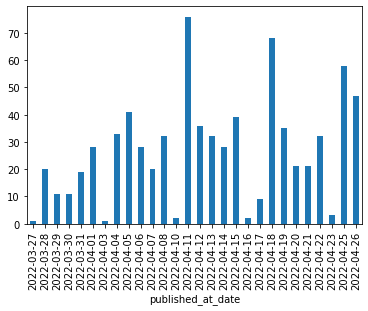

In [15]:
totals.plot(kind="bar", fontsize=10)

In [16]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
vac_df_skills['weekday'] = vac_df_skills['published_at'].dt.day_name()
vac_df_skills.head(5)

,id,premium,name,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,immediate_redirect_url,key_skills,published_at_date,weekday
0,54852945,False,Менеджер по работе с клиентами,False,False,NaN,None,None,2022-04-15 15:42:48+03:00,2022-04-15T15:42:48+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-04-15,Friday
1,53867545,False,Старший кредитный аналитик (малый бизнес),False,False,NaN,None,None,2022-04-11 17:49:36+03:00,2022-04-11T17:49:36+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Анализ ФХД'}, {'name': 'Финансовый ...",2022-04-11,Monday
2,54852814,False,Клиентский менеджер прямых продаж,False,False,NaN,None,None,2022-04-15 15:39:37+03:00,2022-04-15T15:39:37+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-04-15,Friday
3,54715174,False,QA specialist,False,False,NaN,None,None,2022-04-11 10:07:10+03:00,2022-04-11T10:07:10+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-04-11,Monday
4,53361761,False,Клиентский менеджер малого и микробизнеса,False,False,NaN,None,None,2022-04-03 10:44:38+03:00,2022-04-03T10:44:38+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Активные продажи'}, {'name': 'Прове...",2022-04-03,Sunday


In [17]:
totals_weekday = vac_df_skills.groupby("weekday")["id"].count().sort_values()

<AxesSubplot:xlabel='weekday'>

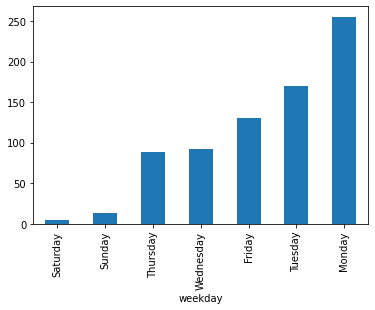

In [18]:
totals_weekday.plot(kind="bar", fontsize=10) 

In [19]:
# Найдите те вакансии с использованием python, которые вам интересны
key_words = ['Data', 'Analyst', 'Аналитик данных']

In [20]:
search_df = vac_df_skills[vac_df_skills['name'].str.contains(pat='|'.join(key_words), na=False, regex=True)]
search_df.tail()

,id,premium,name,has_test,response_letter_required,address,response_url,sort_point_distance,published_at,created_at,...,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id,address.metro,immediate_redirect_url,key_skills,published_at_date,weekday
744,51411620,False,"Главный инженер по сопровождению (SberData, пр...",False,False,NaN,None,None,2022-04-18 14:02:11+03:00,2022-04-18T14:02:11+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'ITSM'}, {'name': 'ITIL'}, {'name': ...",2022-04-18,Monday
746,54238546,False,Главный инженер сопровождения технологических ...,False,False,NaN,None,None,2022-04-22 10:46:45+03:00,2022-04-22T10:46:45+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Jenkins'}, {'name': 'Ansible'}, {'n...",2022-04-22,Friday
747,54916371,False,Devops (SberData),False,False,NaN,None,None,2022-04-19 11:43:01+03:00,2022-04-19T11:43:01+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Git'}, {'name': 'Linux'}, {'name': ...",2022-04-19,Tuesday
748,54768318,False,Эксперт сопровождения Hadoop (SberData),False,False,NaN,None,None,2022-04-26 09:58:00+03:00,2022-04-26T09:58:00+0300,...,9,55.70961,37.622569,"[{'station_name': 'Тульская', 'line_name': 'Се...",146841,NaN,NaN,"[{'name': 'Linux'}, {'name': 'Bash'}, {'name':...",2022-04-26,Tuesday
750,54238661,False,Эксперт сопровождения Hadoop (SberData),False,False,NaN,None,None,2022-04-22 10:46:55+03:00,2022-04-22T10:46:55+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Linux'}, {'name': 'Bash'}, {'name':...",2022-04-22,Friday


In [21]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий.
skills_data = search_df['key_skills'].tolist()
skill_list = []
for x in range(len(skills_data)):
    for k in range(len(skills_data[x])):
        skill_list.append(skills_data[x][k]['name'])

In [22]:
demanded_skill = pd.Series(skill_list).value_counts()
demanded_skill.head(10)

SQL                25
Python             21
Spark              15
Hadoop             11
Linux              11
Big Data           10
Java                9
Git                 8
Английский язык     7
PostgreSQL          7
dtype: int64

In [25]:
# Постройте график наиболее востребованных вакансий
demanded_search = search_df.groupby("name")["id"].count().sort_values(ascending = False)
demanded_search

name
Data Engineer                                                                  5
Аналитик данных                                                                4
Data Scientist                                                                 3
Data engineer                                                                  2
Data Архитектор (SberData)                                                     2
Главный инженер по сопровождению (SberData, проект "Лаборатория Данных")       2
Эксперт сопровождения Hadoop (SberData)                                        2
Системный аналитик (Команда архитектуры Хранилища данных, SberData)            2
Senior Data Scientist/ML Engineer SberDevices                                  1
Senior Java разработчик (SberData)                                             1
Senior Data Scientist                                                          1
Senior Data Engineer/Analyst                                                   1
Senior/Team Lead Data S

<AxesSubplot:ylabel='name'>

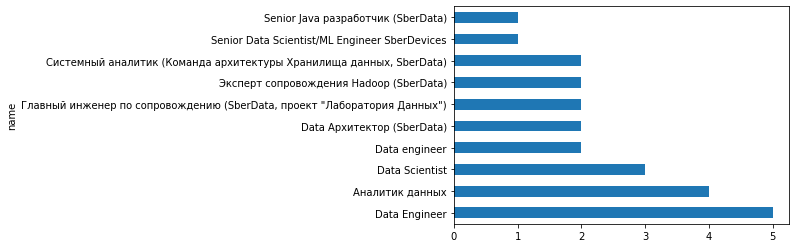

In [26]:
demanded_search.head(10).plot(ylabel='Количество', kind="barh", fontsize=10) 